# 6. Деревья решений



Деревья решений являются одним из наиболее понятных человеку и в то же время мощных алгоритмов принятия решений. К тому же на их основе строятся самые эффективные ансамблевые модели машинного обучения, такие как случайный лес, о котором мы поговорим далее.

Алгоритмы на основе деревьев решений могут использоваться как для решения задач классификации, так и для регрессии. В этом модуле мы разберём задачу классификации, а в дальнейшем, когда будем разбирать математическую составляющую алгоритмов, поговорим о том, как научить дерево решать задачу регрессии.



__ решающее дерево предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил. Этот процесс в некотором смысле согласуется с естественным для человека процессом принятия решений.__

Аналогичным образом работает и алгоритм машинного обучения под названием «дерево решений» (Decision Tree).

Если дерево уже обучено, то есть уже сформулированы условия в прямоугольниках, то, когда в страховую компанию придёт новый автовладелец, сотруднику будет достаточно прогнать данные клиента через дерево решений и таким образом принять решение, то есть произвести классификацию.

Успешнее всего деревья применяют в следующих областях:

Банковское дело. Оценка кредитоспособности клиентов банка при выдаче кредитов.
Промышленность. Контроль качества продукции (обнаружение дефектов в готовых товарах), испытания без нарушений (например, проверка качества сварки) и т. п.
Медицина. Диагностика заболеваний разной сложности.
Молекулярная биология. Анализ строения аминокислот.
Торговля. Классификация клиентов и товара.

Формально структура дерева решений — это связный ациклический граф.

__Граф__ — это абстрактная топологическая модель, которая состоит из вершин и соединяющих их рёбер.

__Связный граф__ — это граф, в котором между любой парой существует направленная связь.

__Ациклический граф__ — это граф, в котором отсутствуют циклы, то есть в графе не существует такого пути, по которому можно вернуться в начальную вершину.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/f129c44f5e025daed9f6d4ff9c6b9d2f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/ML_3_6_2.png)



В дереве решений можно выделить три типа вершин:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/f0d47167ef66310bceaa98aacb01d7c7/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/ML_3_6_3.png)

* Корневая вершина (root node) — то, откуда всё начинается. Это первый и самый главный вопрос, который дерево задаёт объекту. В примере со страхованием это был вопрос «Возраст автовладельца > 40».
* Внутренние вершины (intermediate nodes) — это дополнительные уточняющие вопросы, которые дерево задаёт объекту.
* Листья (leafs) — конечные вершины дерева. Это вершины, в которых содержится конечный «ответ» — класс объекта.

Максимально возможная длина от корня до самых дальних листьев (не включая корневую) называется максимальной глубиной дерева (max depth).

Логический критерий, который находится в каждой вершине, называется __предикатом__, или __решающим правилом__.

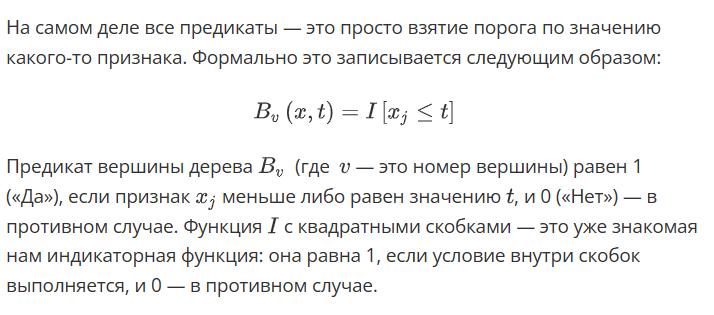

Примечание. В зависимости от реализации предикат может быть с условием <= или >= . В реализации sklearn используется условие <=. Но вы можете встретить другую формулировку предикатов в иных реализациях или в литературе.

Если результат предиката равен 1, то мы переходим по левой ветви дерева к следующему узлу, в противном случае — по правой ветви дерева к следующему узлу.

Глубина дерева = 0.

Дерево задаёт первый вопрос: petal length <= 2.45. Это выражение соответствует вертикальной прямой, которая делит пространство на две части по признаку petal length.

В левую часть пространства попали 50 наблюдений. Это только жёлтые точки пространства — цветы setosa. Значит, дальнейшее разделение не имеет смысла.

В правую часть пространства попали 100 наблюдений. Это и синие, и зелёные объекты классов versicolor и virginica. Значит, нужно попробовать задать ещё одно решающее правило.

Глубина дерева = 1.

Дерево задаёт второй вопрос: petal width <= 1.75. Это выражение соответствует горизонтальной прямой, которая делит оставшееся после прошлого разделения пространство на две части по признаку petal width.

В нижнюю (синюю) часть этого пространства попали 54 наблюдения. Из них 49 цветов класса versicolor и 5 цветов класса virginica.

Максимальная глубина достигнута. В полученной части пространства преобладает класс versicolor, значит все наблюдения, которые находятся в этой части, дерево будет относить к классу versicolor.

В верхнюю (зелёную) часть этого пространства попали 46 наблюдений. Из них 1 цветок класса versicolor и 45 цветов класса virginica.

Максимальная глубина достигнута. В полученной части пространства преобладает класс virginica, значит все наблюдения, которые находятся в этой части, дерево будет относить к классу virginica.

__ПРОЦЕСС ПОСТРОЕНИЯ ДЕРЕВА РЕШЕНИЙ__

Мы рассмотрим стратегию, реализованную в библиотеке sklearn, — алгоритм CART (Classification and Regression Tree), который предназначен для построения бинарных деревьев решений (деревьев, у которых каждая вершина связана с двумя другими вершинами нижнего уровня). Данный алгоритм, как следует из его названия, предназначен для решения задач классификации и регрессии.

## ПОИСК ПАРАМЕТРОВ ДЕРЕВА РЕШЕНИЙ



Важно понимать, что дерево решений — это топологический алгоритм, а не аналитический, то есть структуру дерева не получится описать в виде формулы, как те же линейные модели. __Поэтому про стандартные методы оптимизации, такие как градиентный спуск или тем более метод наименьших квадратов, можно забыть.__

Неопределённость можно измерять различными способами, в деревьях решений для этого используются энтропия Шеннона и критерий Джини. Мы подробно обсудим их реализацию в модулях по математике.

Энтропия — это очень важное понятие, используемое в физике, теории информации и других областях. Опуская предпосылки введения этого понятия, отметим, что интуитивно энтропия соответствует степени хаоса в системе. Чем выше энтропия, тем менее упорядочена система, и наоборот.

Все слагаемые в сумме неотрицательные, поэтому критерий Джини также неотрицателен. Его минимум достигается только в том случае, когда все объекты в выборке относятся к одному классу.

Важно!

Всегда используйте регуляризацию деревьев — ограничивайте их максимальную глубину (max_depth) и минимальное число объектов в листе (min_samples_leaf).

К тому же всегда стоит иметь под рукой не только обучающий, но и тестовый набор данных, чтобы оценить переобучение. Об этом мы поговорим в финальном практическом юните.